In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%load_ext autoreload
%autoreload 2
import nlpUtils as nlpUtils
import plotUtils as pUtils

In [3]:
# define constants
numBooks = 4
numTopics = 7 # number of topics or clusters
low_doc_freq = 0.01
high_doc_freq = 0.75
do_LDA = False
do_page_instead_of_chapter = True

In [4]:
if do_page_instead_of_chapter: text_column = 'page_text'
else: text_column = 'chapter_text'

In [5]:
# read in saved dataframe containing chapter text
if do_page_instead_of_chapter: unpickled_df = pd.read_pickle("./sla_page_text.pkl")
else: unpickled_df = pd.read_pickle("./sla_chapter_text.pkl")
unpickled_df

page_text  book  page  chapter
0     prelud stormlight archiv kalak round rocki sto...     1     1        1
1     danger die sent back choic surviv desol suppos...     1     2        1
2     would back place went desol place nightmar kal...     1     3        1
3     see us divin kalak whisper reli upon us jezrie...     1     4        1
4                          book one way king year later     1     5        1
...                                                 ...   ...   ...      ...
5811  game play game sens sens odium kind nonsens we...     4  1578      131
5812  rays grow thought wit need worri odium would s...     4  1579      131
5813  storytel said empti hallway essenti cheat tuck...     4  1580      131
5814  notic touch contract dramat voic said head alw...     4  1581      131
5815  wit ﬁrst face face meet odium thousand year go...     4  1582      131

[5816 rows x 4 columns]

In [6]:
# vectorize chapter text
vectorized_matrix, vectorizer = nlpUtils.vectorizeTextIDF(unpickled_df[text_column], low_doc_freq, high_doc_freq, False) # for NMF and kMeans
if do_LDA: vectorized_matrix_noidf, vectorizer_noidf = nlpUtils.vectorizeText(unpickled_df[text_column], low_doc_freq, high_doc_freq, False) # for LDA
    
print(vectorized_matrix.shape)

(5816, 1945)


In [7]:
# do NMF
doc_top_matrix, _, nmf_top_words = nlpUtils.doNMF(numTopics, vectorized_matrix, vectorizer)

# do kMeans clustering
doc_clusters, kMeans_top_words = nlpUtils.dokMeans(numTopics, vectorized_matrix, vectorizer)

# do LDA
if do_LDA: lda_doc_probs = nlpUtils.doLDA(numTopics, vectorized_matrix_noidf, vectorizer_noidf)


NMF Topic Words:
Topic 0: shallan jasnah veil pattern back bright
Topic 1: kaladin bridg teft syl moash rock
Topic 2: dalinar sadea king elhokar gavilar men
Topic 3: venli eshonai human rhythm form hum
Topic 4: adolin father renarin duel sadea blade
Topic 5: szeth taravangian lash sword stormlight blade
Topic 6: navani raboniel sibl fabrial tower gemston

kMeans Cluster Words:
Cluster 0: navani szeth raboniel fabrial sibl gemston
Cluster 1: kaladin kal back hand peopl way
Cluster 2: shallan jasnah veil pattern father back
Cluster 3: adolin shallan kaladin father dalinar sadea
Cluster 4: kaladin bridg teft syl moash rock
Cluster 5: dalinar sadea navani king men back
Cluster 6: venli eshonai human rhythm raboniel hum


In [8]:
# update dataframe with document topics and clusters
df_with_results = unpickled_df.copy()
df_with_results['NMF'] = doc_top_matrix[:].tolist() # put NMF vectors into df
df_with_results['NMF_Top_Topic'] = [np.asarray(values).argmax() for values in df_with_results['NMF']] # put best topic from NMF into df
df_with_results['kMeans'] = doc_clusters # put kMeans cluster number into df
if do_LDA: df_with_results['LDA'] = lda_doc_probs
df_with_results

page_text  book  page  chapter  \
0     prelud stormlight archiv kalak round rocki sto...     1     1        1   
1     danger die sent back choic surviv desol suppos...     1     2        1   
2     would back place went desol place nightmar kal...     1     3        1   
3     see us divin kalak whisper reli upon us jezrie...     1     4        1   
4                          book one way king year later     1     5        1   
...                                                 ...   ...   ...      ...   
5811  game play game sens sens odium kind nonsens we...     4  1578      131   
5812  rays grow thought wit need worri odium would s...     4  1579      131   
5813  storytel said empti hallway essenti cheat tuck...     4  1580      131   
5814  notic touch contract dramat voic said head alw...     4  1581      131   
5815  wit ﬁrst face face meet odium thousand year go...     4  1582      131   

                                                    NMF  NMF_Top_Topic  kMeans  
0     [0.014132078072339484, 0.026386346880230165, 0...              5       1  
1     [0.017207569009532714, 0.023660205193669858, 0...              5       1  
2     [0.018853516982813723, 0.026043685734370457, 0...              5       1  
3     [0.015836512199100778, 0.01614824407984887, 0....              5       1  
4     [0.013484953926169338, 0.0, 0.0205561284972599...              2       1  
...                                                 ...            ...     ...  
5811  [0.014274507936431802, 0.0, 0.0647435711077174...              2       1  
5812  [0.023337433302416694, 0.01019329987735665, 0....              2       1  
5813  [0.023106022247227537, 0.018830229075678263, 0...              0       1  
5814  [0.020408116567545924, 0.005862332411610378, 0...              2       1  
5815  [0.013566004030578824, 0.0, 0.0149773183497878...              2       1  

[5816 rows x 7 columns]

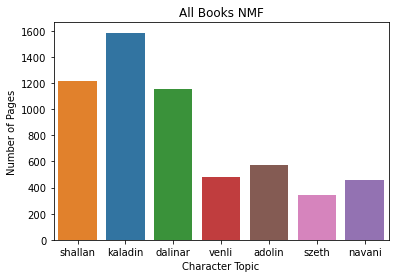

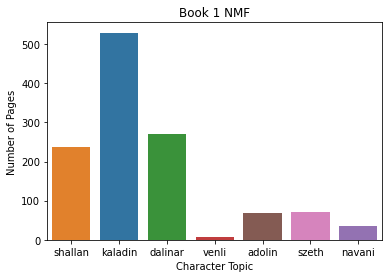

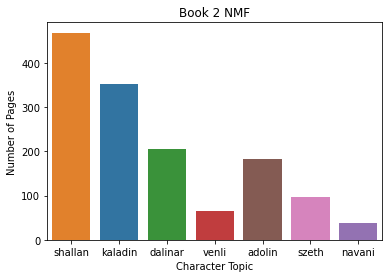

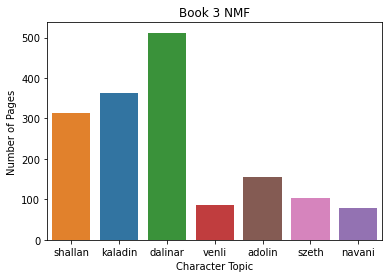

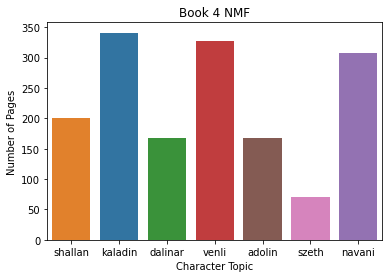

In [9]:
# look at topics or clusters versus book number

# kMeans
# for i in range(numBooks+1):
#     if i == 0 :
#         pUtils.getClusterCounts(df_with_results, kMeans_top_words, i)
#     else:
#         pUtils.getClusterCounts(df_with_results[df_with_results['book'] == i], kMeans_top_words, i)

        
# NMF (top topic)
for i in range(numBooks+1):
    if i == 0 :
        pUtils.getNMFCounts(df_with_results, nmf_top_words, i)
    else:
        pUtils.getNMFCounts(df_with_results[df_with_results['book'] == i], nmf_top_words, i)
     

In [10]:
# dimensionality reduction plots with kMeans results on the vectorizer output directly
if not do_page_instead_of_chapter:
    pUtils.makeMDSPlot(vectorized_matrix, df_with_results, kMeans_top_words)
    pUtils.makeTSNEPlot(vectorized_matrix, df_with_results, kMeans_top_words, 50)

In [11]:
# make tSNE plot with different perplexities to compare them
# for perp in np.linspace(10,50,5):
#     pUtils.makeTSNEPlot(vectorized_matrix, df_with_results, kMeans_top_words, perp)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5816 samples in 2.162s...
[t-SNE] Computed neighbors for 5816 samples in 131.445s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5816
[t-SNE] Computed conditional probabilities for sample 2000 / 5816
[t-SNE] Computed conditional probabilities for sample 3000 / 5816
[t-SNE] Computed conditional probabilities for sample 4000 / 5816
[t-SNE] Computed conditional probabilities for sample 5000 / 5816
[t-SNE] Computed conditional probabilities for sample 5816 / 5816
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.686035
[t-SNE] KL divergence after 1000 iterations: 0.926089


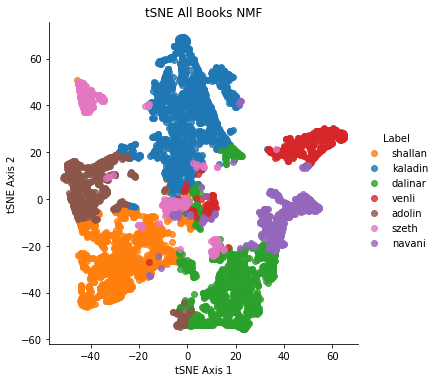

In [12]:
# make tSNE plot with NMF topic vectors per document, color assigned by majority topic
pUtils.makeTSNEPlotFromNMF(vectorized_matrix, df_with_results, nmf_top_words, 50)

In [13]:
# make tSNE plot with different perplexities to compare them (for NMF results)
# for perp in np.linspace(10,50,5):
#     pUtils.makeTSNEPlotFromNMF(vectorized_matrix, df_with_results, nmf_top_words, perp)

In [14]:
# now separate out the chapters for a specific character and do topic modeling/visualization/sentiment analysis on that

Character: Shallan

NMF Topic Words:
Topic 0: wagon men caravan ask back peopl
Topic 1: father hous tabl kill brother highprinc
Topic 2: part feel better river ﬁnd annoy
Topic 3: wall light stormlight hand step bead
Topic 4: radiant spren thought spi human mission
Topic 5: book ardent bright well king soulcast
Topic 6: draw sketch page pencil map line


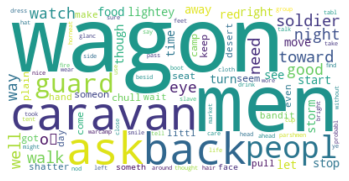

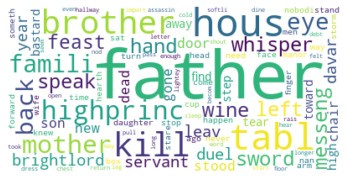

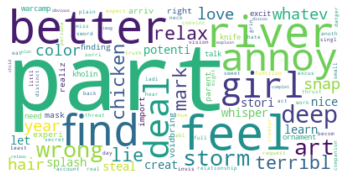

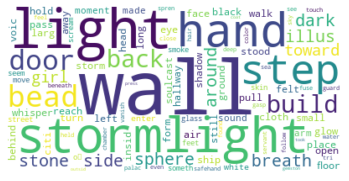

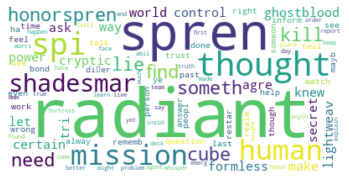

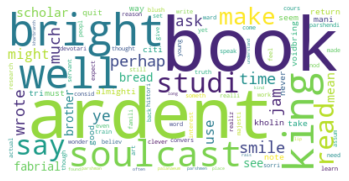

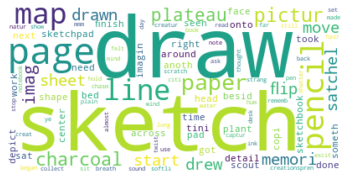


Character: Kaladin

NMF Topic Words:
Topic 0: ask need someth say help right
Topic 1: bridg bridgemen parshendi men crew arrow
Topic 2: pursuer fuse creatur light lash stormlight
Topic 3: spear blade shardbear ground shardblad weapon
Topic 4: father surgeon wound son mother boy
Topic 5: light wind storm stone chasm wall
Topic 6: king guard sir door men soldier


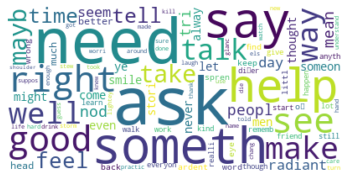

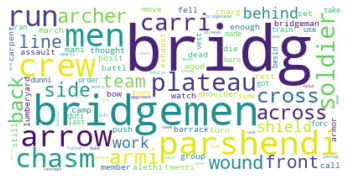

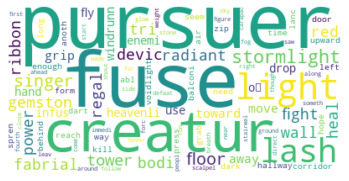

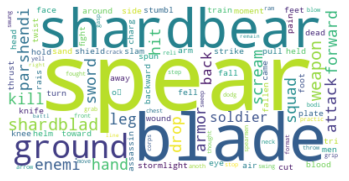

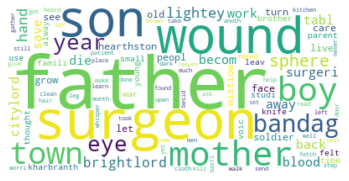

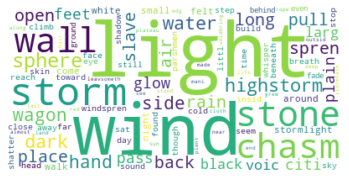

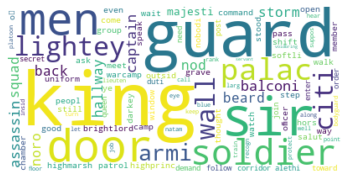


Character: Dalinar

NMF Topic Words:
Topic 0: king highprinc father way someth make
Topic 1: parshendi plateau bridg armi forc shardbear
Topic 2: stone blade hand side back arm
Topic 3: odium champion god win power fuse
Topic 4: citi oathgat enemi azish thaylen troop
Topic 5: stormfath vision storm radiant herald almighti
Topic 6: sir soldier brightlord men bridg hors


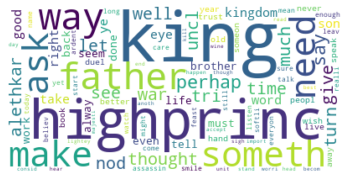

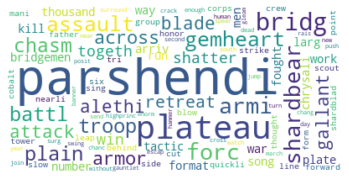

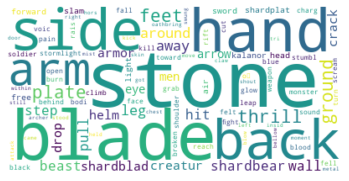

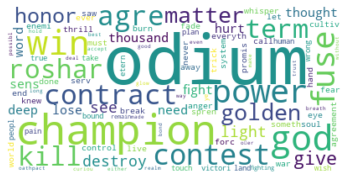

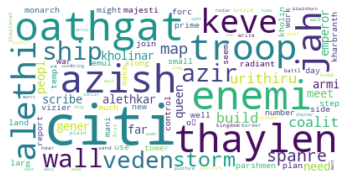

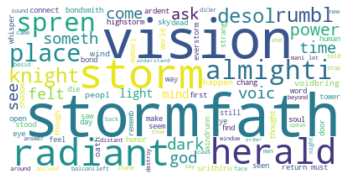

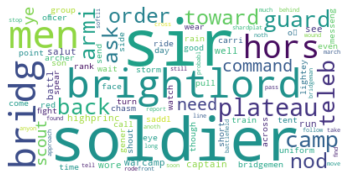


Character: Venli

NMF Topic Words:
Topic 0: radiant tower puls hum use ask
Topic 1: mother song day attun gemston stanza
Topic 2: stone wind light storm spren ground
Topic 3: pursuer stormbless kill soldier nine shout
Topic 4: form new rhythm someth storm peopl
Topic 5: citi human famili listen king song
Topic 6: fuse odium singer nine human passion


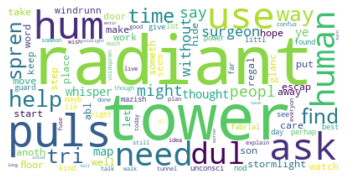

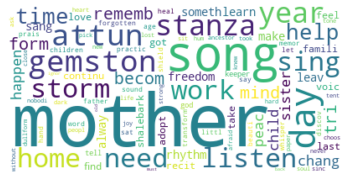

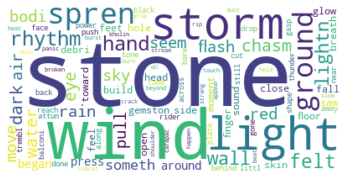

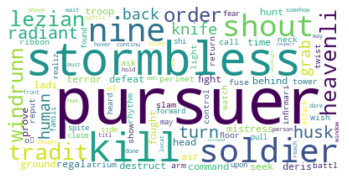

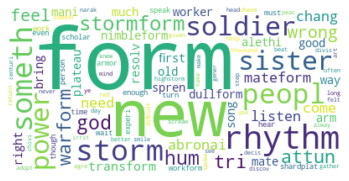

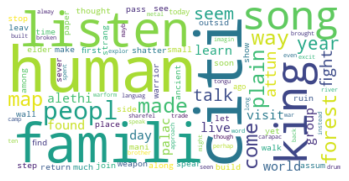

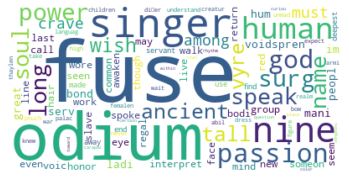


Character: Adolin

NMF Topic Words:
Topic 0: father see someth well say right
Topic 1: honorspren spren trial honor radiant blend
Topic 2: blade hand shardblad sword assassin spear
Topic 3: reli elit duel plate ﬁght blade
Topic 4: hors gallant ryshadium sword ride sureblood
Topic 5: parshendi plateau shardbear men father bridg
Topic 6: citi guard palac wall men door


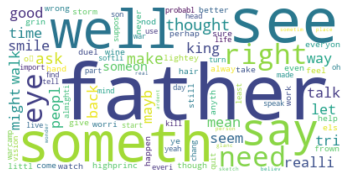

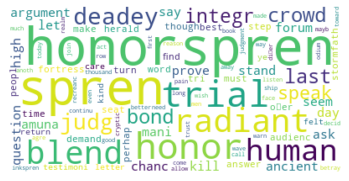

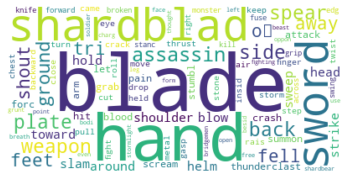

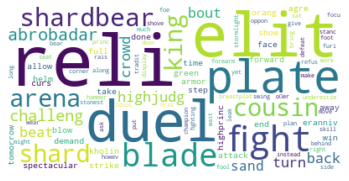

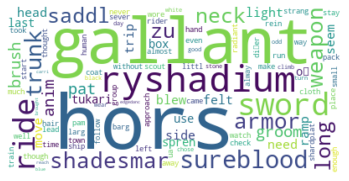

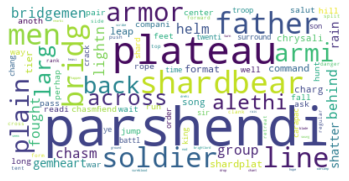

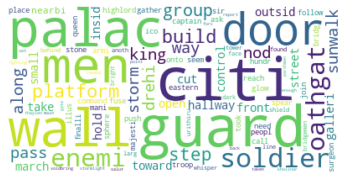


Character: Szeth

NMF Topic Words:
Topic 0: sword hand blade stone weapon scream
Topic 1: shardbear king lash blade shardblad stormlight
Topic 2: dark guard hallway minion door wall
Topic 3: odium plan god power fear smart
Topic 4: day diagram intellig page today stupid
Topic 5: lash upward pouch plateau chasm stormlight
Topic 6: sword ideal skybreak son law ki


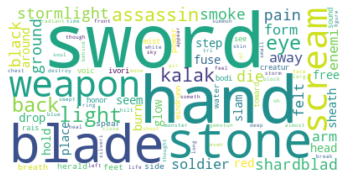

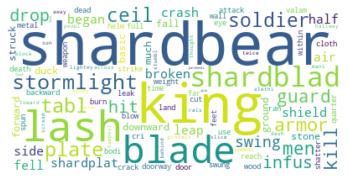

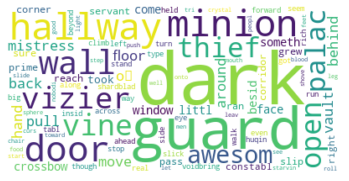

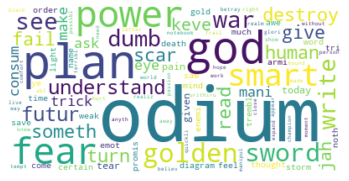

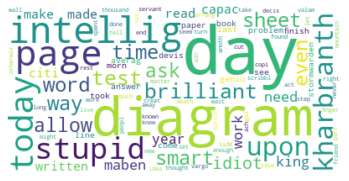

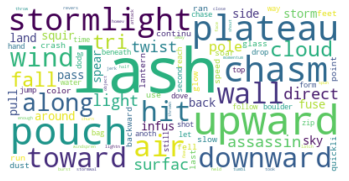

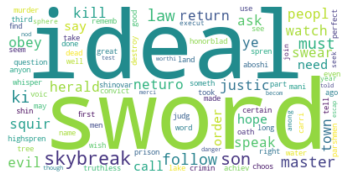


Character: Navani

NMF Topic Words:
Topic 0: thought ask well end vision smile
Topic 1: stormlight light voidlight sphere mix diamond
Topic 2: fabrial gemston spren coalit jesevan mechan
Topic 3: stone wall tower ﬂoor men soldier
Topic 4: spren tower human radiant need node
Topic 5: devic weight tomor rubi fabrial move
Topic 6: tone rhythm sing hum plate song


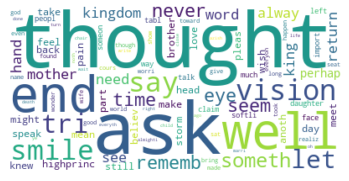

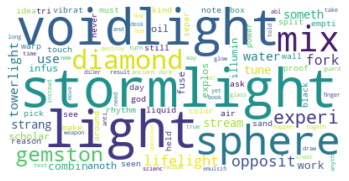

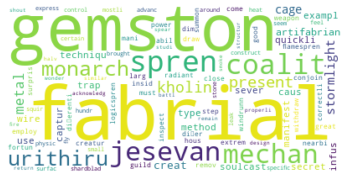

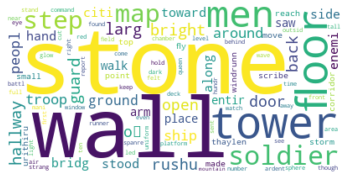

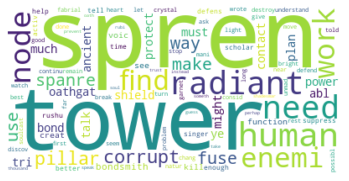

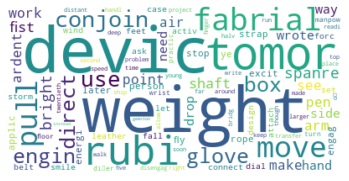

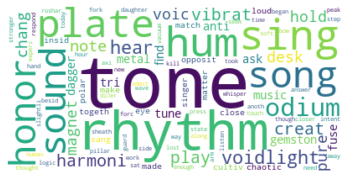

In [19]:
if not do_page_instead_of_chapter: numSubTopics = [6, 6, 6, 6, 6, 5, 4] # this will get messed up if I change my original NMF in any way, and if I increase the number of topics from 7
else: numSubTopics = [7] * numTopics

for topic_num in range(numTopics):
        
    print('Character:', nmf_top_words[topic_num].capitalize())

    df_character = df_with_results[df_with_results['NMF_Top_Topic'] == topic_num]
    
    # topic modeling of only these character chapters

    char_vectorized_matrix, char_vectorizer = nlpUtils.vectorizeTextIDF(df_character[text_column], low_doc_freq, high_doc_freq, True)
    char_doc_top_matrix, char_topic_word_matrix, char_nmf_top_words = nlpUtils.doNMF(numSubTopics[topic_num], char_vectorized_matrix, char_vectorizer)
    
#     print(char_topic_word_matrix)
    sub_topic_word_dicts = nlpUtils.getNMF_TopicWord_Dicts(char_topic_word_matrix, char_vectorizer)
    
#     pUtils.makeWordCloudPlot(sub_topic_word_dicts[0])

    for word_dict in sub_topic_word_dicts:
        pUtils.makeWordCloudPlot(word_dict)


    if do_LDA: 
        char_vectorized_matrix_noidf, char_vectorizer_noidf = nlpUtils.vectorizeText(df_character[text_column], low_doc_freq, high_doc_freq, True) # for LDA
        char_lda_doc_probs = nlpUtils.doLDA(numSubTopics[topic_num], char_vectorized_matrix_noidf, char_vectorizer_noidf)
    
    print()


In [16]:
# for topic_num in range(numTopics):
# for topic_num in range(2):
    
#     print('Looking at character:', nmf_top_words[topic_num])

#     df_character = df_with_results[df_with_results['NMF_Top_Topic'] == topic_num]
    
#     # sentiment analysis tests of character dataframes

#     global_chapter_numbers = []
#     polarity_scores = []
# #     vader_polarity_scores = []

#     for index, row in df_character.iterrows():
#         text_for_sentiment = TextBlob(row[text_column])
#         polarity_scores.append(text_for_sentiment.sentiment.polarity)
#         global_chapter_numbers.append(index)
        
# #         vader_polarity_scores.append(sid_obj.polarity_scores(row[text_column]))
        
# #     print(vader_polarity_scores)

        
    
#     # get top chapters with lowest polarity scores
#     top_negative_scores_indices = np.asarray(polarity_scores).argsort()[:2][::]
    
#     for ind in top_negative_scores_indices:
#         print(global_chapter_numbers[ind]+1, polarity_scores[ind])
#         print(df_character.iloc[ind])
#         print()    

# #     plot sentiment versus chapter number
#     sns.lineplot(x=global_chapter_numbers, y=polarity_scores)
#     plt.show()